Nhóm 14
Thành viên:
- Hoàng Minh Nhật 24550031
- Đoàn Chí Hưng 24550014

Tên đề tài: Phân tích tỉ lệ sống sót Titanic - phân tích thăm dò và xây dựng mô hình

## Phân tích thăm dò và tiền xử lý dữ liệu

### Thăm dò chung

In [2]:
# import

import os
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy import stats

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data

url = "https://raw.githubusercontent.com/potatomat0/DA-notebook/626231cdaef0f2a2dffe4d22a200245ad237ca6a/KLTN/titanic.csv"
train_df = pd.read_csv(url)

In [4]:
print("các biến trong dataset")
print(train_df.columns)

print("dữ liệu 5 dòng đầu của dataset")
train_df.head(5)

các biến trong dataset
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
dữ liệu 5 dòng đầu của dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Phân bổ giá trị trong dataset")
train_df.describe().T

Phân bổ giá trị trong dataset


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
print("kiểu dữ liệu và số lượng dòng có giá trị của từng biến")
train_df.info()




kiểu dữ liệu và số lượng dòng có giá trị của từng biến
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Mô tả các biến

- PassengerId: Mã định danh duy nhất cho mỗi hành khách
- Survived: Trạng thái sống sót (1 = sống sót, 0 = không sống sót)
- Pclass: Hạng vé (hạng 1, hạng 2, hạng 3)
- Name: Họ tên đầy đủ của hành khách
- Sex: Giới tính của hành khách
- Age: Tuổi của hành khách (tính bằng năm)
- SibSp: Số anh chị em/vợ chồng đi cùng trên tàu
- Parch: Số cha mẹ/con cái đi cùng trên tàu
- Ticket: Số vé
- Fare: Giá vé (tính bằng bảng Anh)
- Cabin: Số/phân hạng cabin
- Embarked: Cảng lên tàu
    - C: Cherbourg
    - Q: Queenstown
    - S: Southampton


- Các biến số bao gồm: Age, PassengerId, Fare
- Các biến phân loại bao gồm:  Categorical Variables: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, SibSp, Parch

### Phân tích chung các biến phân loại

Ở đây, ta dùng biểu đồ cột (barplot) cho các biến phân loại có số đếm (dễ định lượng và trực quan): Survived, Sex, Pclass, Embarked và Parch

In [7]:
def bar_plot(variable):
    # Extract column
    var = train_df[variable]

    # Count categories
    varValue = var.value_counts()

    # Plot
    plt.figure(figsize=(9, 3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    # Print counts
    print(f"{variable}: \n{varValue}")

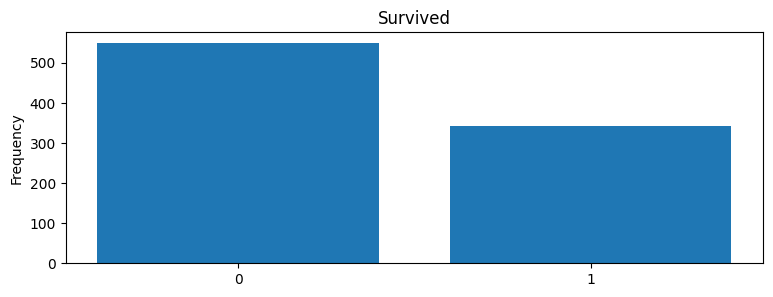

Survived: 
Survived
0    549
1    342
Name: count, dtype: int64


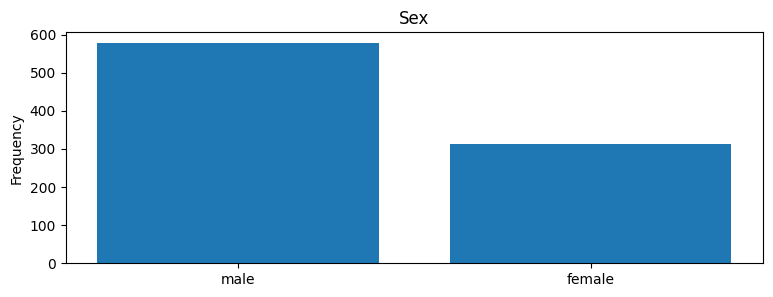

Sex: 
Sex
male      577
female    314
Name: count, dtype: int64


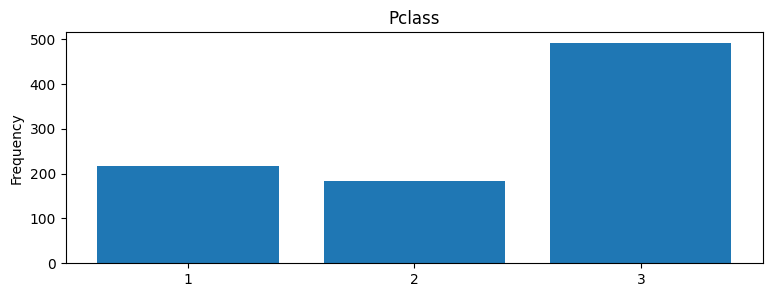

Pclass: 
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


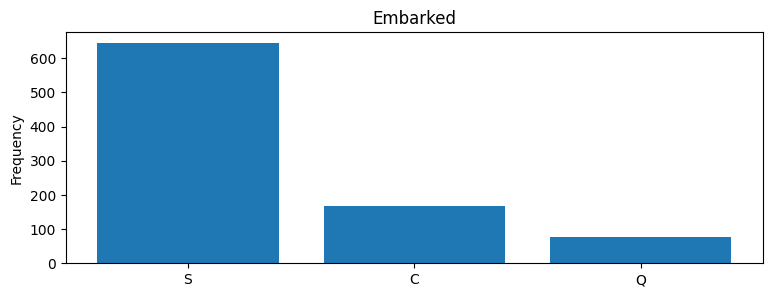

Embarked: 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


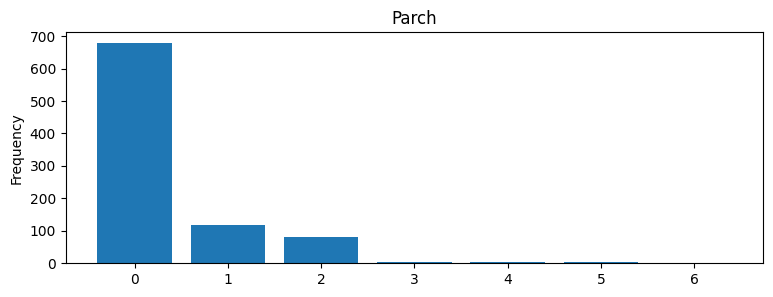

Parch: 
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [8]:
category_count = ["Survived", "Sex", "Pclass", "Embarked", "Parch"]
for i in category_count:
    bar_plot(i)

**Nhận xét**: Sau khi quan sát các kết quả bar plot của các biến phân loại có kiểu số đếm, ta thấy rằng:
- Survived:  số người không sống sót là 549 (Survived = 0), trong khi đó số người sống sót (survived = 1) 342. Tỉ lệ Sống sót/Không sống sót là 62.29%
- Sex: Số lượng hành khách nam nhiều hơn hành khách nữ (577 so với 314) .64.75% hành khách là nam.
- Pclass: Vé hạng 3 là phổ biến nhất (491 người), tiếp theo là hạng 1 (216) và cuối cùng là hạng 2 (184). 55.1% hành khách trên Titanic là khách phổ thông (hạng 3)
- Embarked: Cảng Southampton (S) có số lượng hành khách lên tàu cao nhất (644 người).Tiếp theo là cảng Cherbourg (168) và cuối cùng là Queenstown với 77 người.
- Parch:
  - Đa số hành khách đi một mình, không có cha mẹ hoặc con cái đi cùng (678 người có Parch = 0).
  - Có một số lượng đáng kể hành khách đi cùng 1 hoặc 2 người thân (118 người có Parch = 1 và 80 người có Parch = 2).
  - Có rất ít hành khách đi cùng 3, 4, 5 hoặc 6 người thân.

Tiếp theo, ta phân tích nhóm biến phân loại có nhiều giá trị phân loại, bao gồm: Cabin, name và ticket

In [9]:
category_multiple = ["Cabin", "Name", "Ticket"]
for i in category_multiple:
    print(f"{i} \n{train_df[i].value_counts()}\n")

Cabin 
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

Name 
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Ticket 
Ticket
347082              7
1601                7
CA. 2343            7
3

**Nhận xét**:
- các biến có nhiều hạng mục lớn sẽ không mang nhiều giá trị phân tích nếu chỉ sử dụng phương pháp liệt kê, trong các phần tiếp theo, ta sẽ sử dụng các kỹ thuật gom nhóm và biến đổi để tifm ra tương quan với khả năng sống sót.

### Phân tích chung các biến kiểu số

Ta sử dụng biểu đồ tấn suất để phân tích các biến kiểu số

In [10]:
def plot_hist(variable):
    plt.figure(figsize=(9, 3))
    plt.hist(train_df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Tần suất")
    plt.title(f"phân bổ {variable} ")
    plt.show()


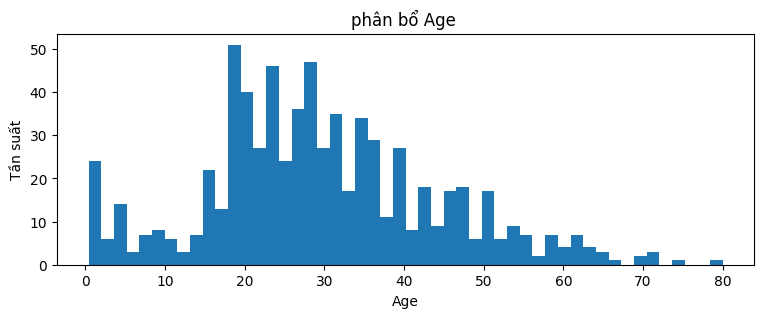

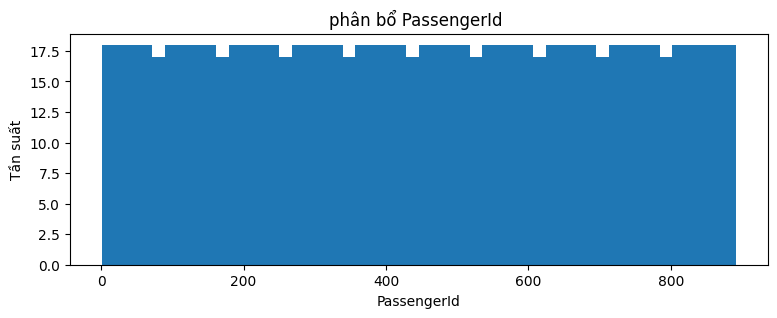

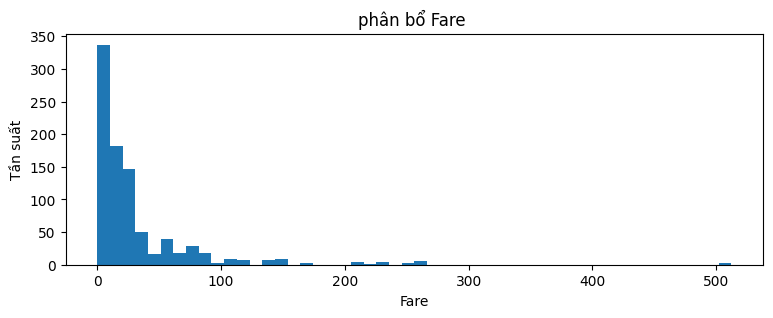

In [11]:
numeric_var = ["Age", "PassengerId", "Fare"]
for i in numeric_var:
    plot_hist(i)

**Nhận xét**
- Biểu đồ phân bổ độ tuổi lệch về bên trái, độ tuổi hành khách chủ yếu giao động từ 18-35, giảm dần sau 40 tuổi. Có rất ít khách trên 50 tuổi và một số lượng đáng kể trẻ em sơ sinh.
- Biểu đồ PassengerId trải đều từ 1 đến 891 với tần suất gần như bằng nhau. không có một xu hướng đáng chú ý.
- Biểu đồ giá vé cho thấy phân bố giá vé lệch phải rất mạnh, đa số trả < 50 bảng trong khi một số ít trả rất cao( từ 200 bảng cho tới hơn 500 bảng), đây là biến có giá trị ngoại lệ (outlier).   

### Phân tích tín hiệu sống sót của các biến

Từ những phân tích chung các biến cả kiểu số và biến phân loại, kết hợp với kiến thức thực tế, ta chọn ra các biến có khả năng ảnh hương đến khả năng sống sót, bao gồm:

- Pclass - Hạng vé: Hạng vé ảnh hưởng đến địa vị kinh tế và xã hội. Ví dụ, khi vụ va chạm xảy ra, khả năng hành khách hạng 1 được ưu tiên tài nguyên cứu cánh sẽ cao hơn.
- Sex - Giới tính: Quy tắc phụ nữ và trẻ em trước của văn hóa phương tây có thể ảnh hưởng đến cơ hội một hành khách được cứu cánh.
- SibSp - Số người thân đi tàu cùng: Người cùng một nhà có thể hỗ trợ nhau
- Parch - Số cha mẹ/ con cái: cũng tương tự với SibSp, người thân có thể ảnh hưởng đến khả năng sống sót. Ngoài ra, ta có thể cân nhắc việc ghép hai biến SibSp và Parch lại thành biến kích thước gia đình không.



Pclass vs Survived


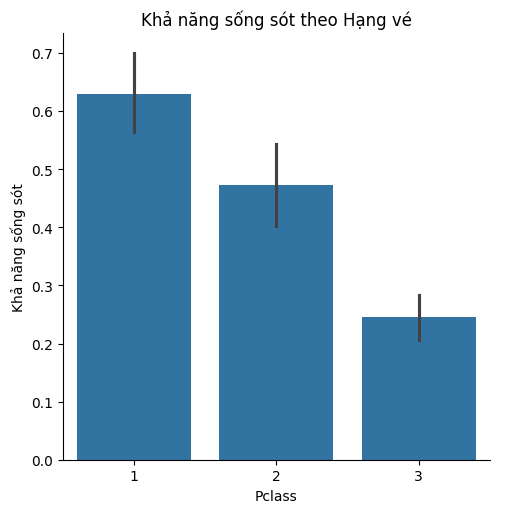


 Sex vs Survived


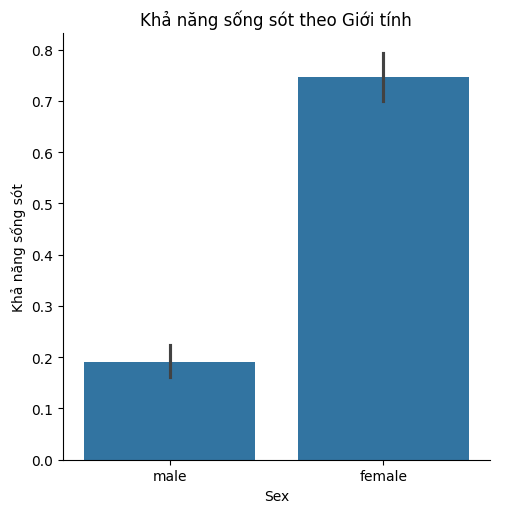


 SibSp vs Survived


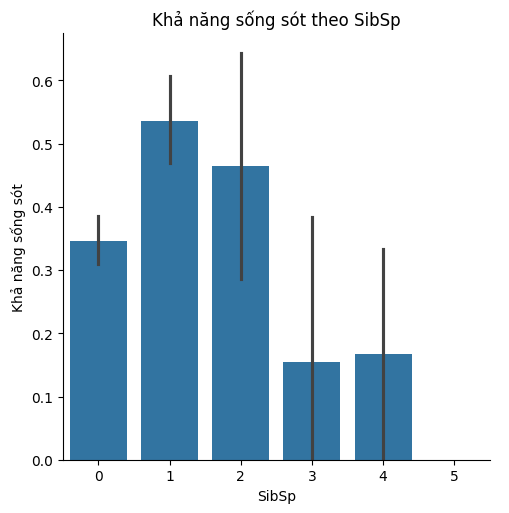


 Parch vs Survived


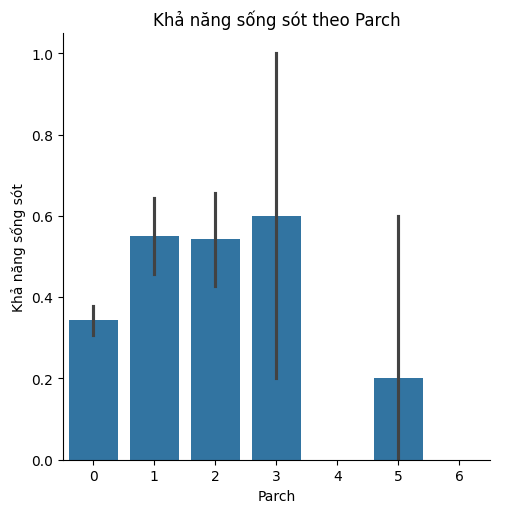

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pclass vs Survived
print("Pclass vs Survived")
g = sns.catplot(x="Pclass", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Khả năng sống sót")
plt.title("Khả năng sống sót theo Hạng vé")
plt.show()


# Sex vs Survived
print("\n Sex vs Survived")
g = sns.catplot(x="Sex", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Khả năng sống sót")
plt.title("Khả năng sống sót theo Giới tính")
plt.show()

# SibSp vs Survived
print("\n SibSp vs Survived")
g = sns.catplot(x="SibSp", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Khả năng sống sót")
plt.title("Khả năng sống sót theo SibSp")
plt.show()

# Parch vs Survived
print("\n Parch vs Survived")
g = sns.catplot(x="Parch", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Khả năng sống sót")
plt.title("Khả năng sống sót theo Parch")
plt.show()

**Nhận xét**
- Pclass: Hạng 1 đạt 0.63, hạng 2 0.47, hạng 3 0.24. Chênh lệch lớn khẳng định Pclass là biến rất giàu tín hiệu.
- Sex:  Nữ 0.74 trong khi nam 0.19. Khoảng cách rất lớn, xác nhận Sex là biến dự báo mạnh nhất.
- SibSp:  Nhỏ nhất khi đi một mình ( 0.35) hoặc đi quá đông (>=3 giảm mạnh, >=5 gần 0). Nhóm  1-2 người (0.54 và 0.46) có lợi thế rõ rệt. Đây là một biến hưu ích.
- Parch = 1-3 có tỷ lệ 0.50-0.60, trong khi 0 chỉ khoảng 0.34 và >=4 rơi xuống <=0.20.



### Tìm kiếm và loại bỏ các outlier

Khi phân tích các biến như Age, SibSp, Parch và Fare, ta thấy có tồn tại các giá trị cực trị (ví dụ như có hành khách trả vé 500 bảng, hoặc có gia đình đi 8 người). Những giá trị này có thể làm lệch giá trị trung bình, làm tăng phương sai và khiến khả năng dự đoán của mô hình thấp đi

Áp dụng quy tắc 1.5 x IQR và yêu cầu bị flag ở >2 biến, ta tìm ra các điểm có giá trị cực trị

In [13]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5

        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)

    multiple_outliers = [i for i, v in outlier_indices.items() if v > 2]

    return multiple_outliers

In [ ]:
train_df.loc[detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


**Nhận xét**: các điểm vị flag tập trung ở 2 gia đình:
- Fortune (Pclass 1, Fare = 263, SibSp = 3, Parch = 2) và
-  Sage (Pclass 3, SibSp = 8, Parch = 2)

In [14]:
# cuối cùng, loại bỏ các outliers
train_df = train_df.drop(detect_outliers(train_df, ["Age","SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop = True)

### Tìm và xử lý giá trị bị thiếu



In [15]:
# tổng các dòng
train_df_len = len(train_df)

In [16]:
# liệt kê các biến có giá trị bị thiếu
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [17]:
# tổng các biến có giá trị bị thiếu
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,170
SibSp,0
Parch,0
Ticket,0
Fare,0


Phân tích khả năng sống sót dựa vào cột bị thiếu feature:

In [18]:
missing_summary = []
for col in ["Age", "Cabin"]:
    indicator = train_df[col].isna().astype(int)  # 1 if missing
    rates = train_df.assign(missing=indicator).groupby("missing")["Survived"].mean()
    missing_summary.append({
        "biến": col,
        "phần trăm bị thiếu": indicator.mean(),
        "% sống sót khi bị thiếu": rates.get(1, float("nan")),
        "% sống sót khi không bị thiếu": rates.get(0, float("nan"))
    })
missing_summary = pd.DataFrame(missing_summary)
missing_summary

,biến,phần trăm bị thiếu,% sống sót khi bị thiếu,% sống sót khi không bị thiếu
0,Age,0.192963,0.305882,0.405063
1,Cabin,0.771850,0.302941,0.666667


 **Nhận xét**:

  - Người không có thông tin tuổi chỉ sống sót ~29.4%.
  - Người không có thông tin cabin sống sót ~30.0%.
  - Người biết tuổi sống sót ~40.6%.
  - Người có cabin được ghi rõ sống sót ~66.7%.

  Việc thiếu dữ liệu không phải ngẫu nhiên. Ví dụ, hành khách có cabin rõ ràng (thường ở hạng cao, gần xuồng cứu sinh) sống sót cao hơn nhiều so với những người không có cabin ghi nhận.

Xử lý dữ liệu bị thiếu:

- Embark: Chỉ bị thiếu 2 cell (0.2%): Số lượng thiếu rất nhỏ và vì đây là biến phân loại, nên ta điền ở đây giá trị phân loại phổ biến nhất so với mức giá vé.
- Age: Sẽ xử lý ở mục tiếp theo
- cabin: Thiếu tới 77%: Ta sẽ đánh dấu giá trị bị thiếu là Unknown, và giữ lại cột này để trích chữ cái đầu của tên Deck cho những trường hợp có thông tin.

#### Xử lý giá trị bị thiếu của Embark:

In [19]:
# in 2 row bị thiếu embark
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


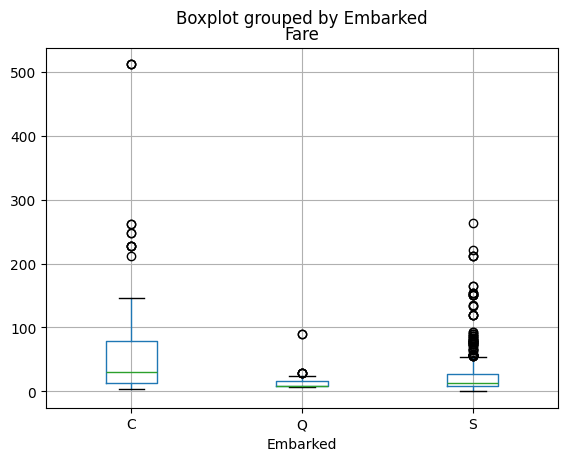

In [20]:
# dùng boxplot để tìm ra Embark phổ biến nhất của những hành khách có Fare là 80 và Pclass là 1
train_df.boxplot(column="Fare", by="Embarked")
plt.show()

In [21]:
# vì cả 2 trường hợp bị thiếu embark có giá vé là 80  nên ta điền giá trị phổ biến nhất là C (cảng Cherbough)
train_df["Embarked"] = train_df["Embarked"].fillna("C")

#### Xử lý giá trị bị thiếu của Age



Ta chọn 3 biến Pclass, Parch, SibSp để ước lượng tuổi vì:
- Giới tính không liên quan đến tuổi
- Cabin bị thiếu quá nhiều.
- Ticket và name là những biến phân mảnh cao.
- Trong khi đó, Pclass, Parch và SibSp có tương quan thống kê như những phân tích chung ở trước đã chỉ ra, do đó được chọn để xử lý giá trị age

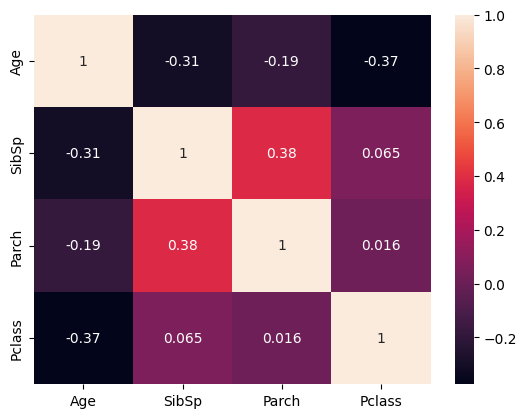

In [22]:
# in biểu đồ heatmap cho tương quan giữa Age, SibSp, Parch và Pclass với age
sns.heatmap(train_df[["Age", "SibSp", "Parch", "Pclass"]].corr(), annot=True)
plt.show()

- Cột Age thiếu gần 20% giá trị nên nếu bỏ qua sẽ làm méo các thống kê và mô hình.
- Heatmap tương quan cho thấy tuổi có quan hệ tương đối với Pclass (hệ số -0.37), SibSp (-0.31) và Parch
  (-0.19).
- Nghĩa là hành khách cùng hạng vé và cấu trúc gia đình thường có độ tuổi tương đồng (vdu: gia đình nhỏ
  ở hạng nhất có xu hướng lớn tuổi hơn).
- Vì vậy ta quyết định ước lượng tuổi dựa trên bộ ba đặc trưng này thay vì điền chung một giá trị cho tất cả.


In [23]:
# điền giá trị bị thiếu của age dựa trên giá trị median của SibSp, Parch và Pclass
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][
        (train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &
        (train_df["Parch"] == train_df.iloc[i]["Parch"]) &
        (train_df["Pclass"] == train_df.iloc[i]["Pclass"])
    ].median()

    age_med = train_df["Age"].median()

    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [24]:
# check lại xem còn giá trị bị thiếu không
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Trực quan hóa dữ liệu



### Tương quan giữa các biến với khả năng sống sót

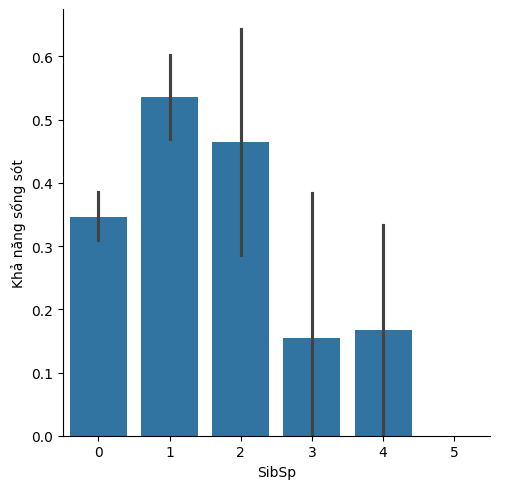

In [25]:
# Khả năng sống sót của SibSp (số anh chị em, cha mẹ)
g = sns.catplot(x="SibSp", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Khả năng sống sót")
plt.show()

**Nhận xét**
- Hành khách với nhiều anh chị em/vợ chồng có khả năng sống sót thấp hơn
- Nếu SibSp là 0, 1, 2 thì khả năng sống sót cao hơn
- Có thể gom nhóm các giá trị này thành biến mới  

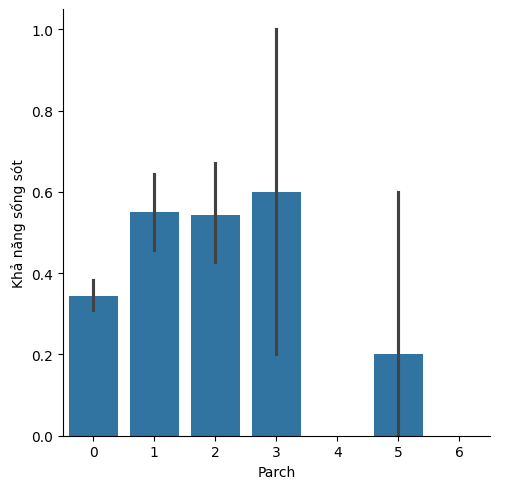

In [26]:
# khả năng sống sót theo số lượng vợ chồng/con cái (Parch)
g = sns.catplot(x="Parch", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Khả năng sống sót")
plt.show()

**Nhận xét**:
- Gia đình nhỏ (<=3) có khả năng sống sót cao hơn
- SibSp và Parch có thể gom nhóm thành một biến mới
- Gia đình số lượng = 3 có sự biến thiên về khả năng sống sót cao nhất

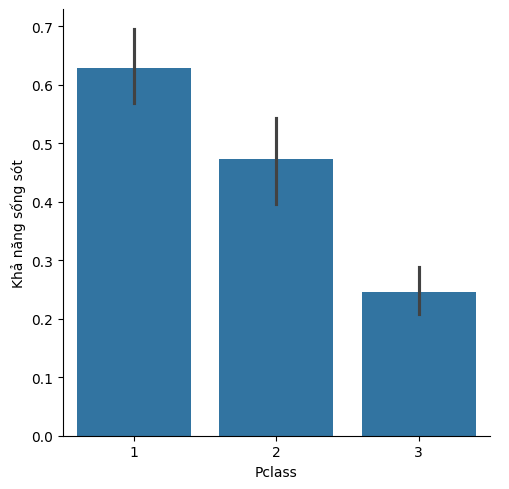

In [27]:
# khả năng sống sót theo hạng vé ( biến Pclass)
g = sns.catplot(x="Pclass", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Khả năng sống sót")
plt.show()

**Nhận xét**:
- Hạng vé càng cao cấp thì khả năng sống sót càng cao

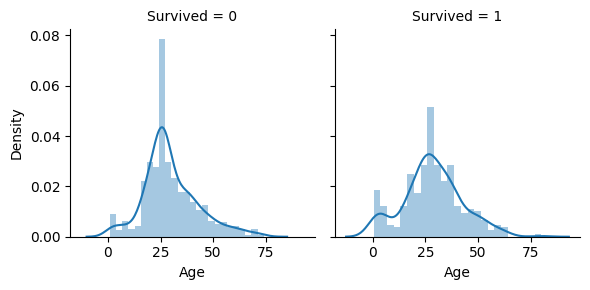

In [28]:
# Phân bổ độ tuổi, chia bởi Survived
g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

,AgeBand,rate,count
0,trẻ em,0.541667,72
1,thành niên,0.468085,47
2,người trẻ,0.324808,391
3,người lớn,0.437500,208
4,trung niên,0.382022,89
5,người cao tuổi,0.356164,73


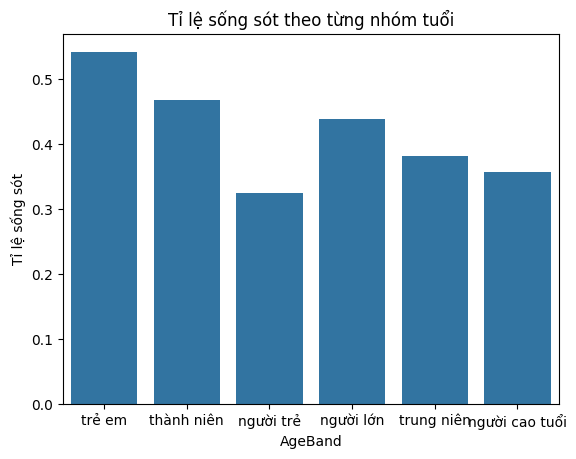

In [29]:
age_bins = pd.cut(
    train_df["Age"],
    bins=[0, 12, 18, 30, 40, 50, 80],
    labels=["trẻ em", "thành niên", "người trẻ", "người lớn", "trung niên", "người cao tuổi"],
    right=False
)
age_summary = (train_df.assign(AgeBand=age_bins)
               .dropna(subset=["AgeBand"])
               .groupby("AgeBand")["Survived"].agg(rate="mean", count="size")
               .reset_index())
display(age_summary)
sns.barplot(data=age_summary, x="AgeBand", y="rate")
plt.ylabel("Tỉ lệ sống sót")
plt.title("Tỉ lệ sống sót theo từng nhóm tuổi")
plt.show()

,FareBand,rate,count
0,"(-0.001, 7.854]",0.217877,179
1,"(7.854, 10.5]",0.201087,184
2,"(10.5, 21.0]",0.437126,167
3,"(21.0, 39.0]",0.443182,176
4,"(39.0, 512.329]",0.645714,175


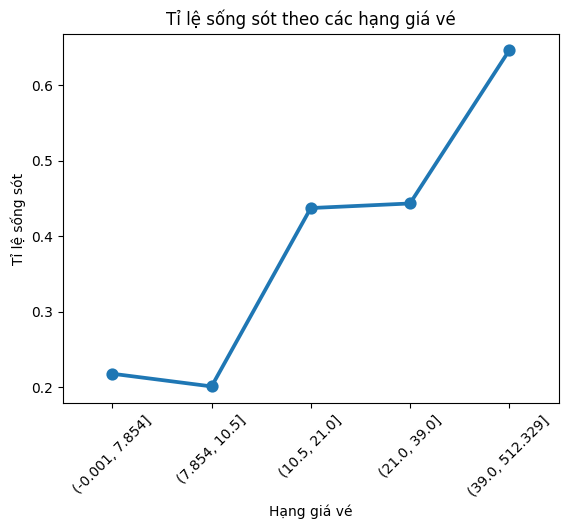

In [30]:
fare_bins = pd.qcut(train_df["Fare"], q=5, duplicates="drop")
fare_summary = (train_df.assign(FareBand=fare_bins)
                .dropna(subset=["FareBand"])
                .groupby("FareBand")["Survived"].agg(rate="mean", count="size")
                .reset_index())
fare_summary["FareBand"] = fare_summary["FareBand"].astype(str)
display(fare_summary)
sns.pointplot(data=fare_summary, x="FareBand", y="rate")
plt.ylabel("Tỉ lệ sống sót")
plt.xlabel("Hạng giá vé")
plt.title("Tỉ lệ sống sót theo các hạng giá vé")
plt.xticks(rotation=45)
plt.show()

**Nhận xét**
- Hành khách độ tuổi <= 10 có tỉ lệ sống sót cao
- Hành khách lớn tuổi nhất là 80 tuổi
- Rất nhiều hành khách độ tuổi 20-25 đã không sống sót
- Phần lớn hành khách nằm trong độ tuổi từ 15-35
- Age là một biến uan trọng trong quá trình training

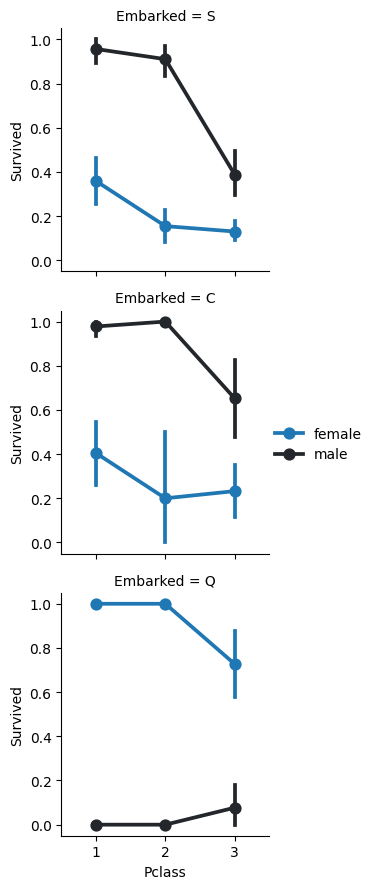

In [31]:
# tương quan giữa Pclass, Sex và Survived

g = sns.FacetGrid(train_df, row="Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

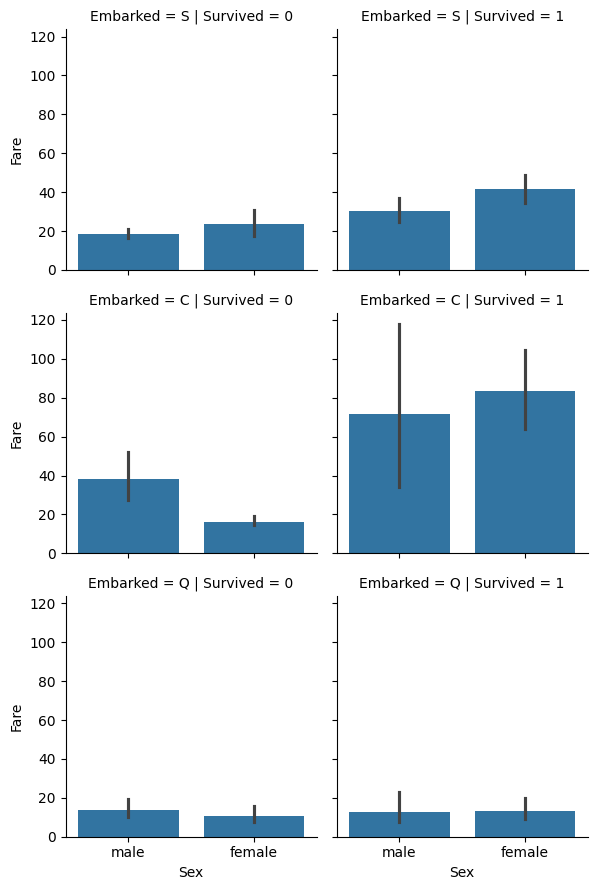

In [32]:
# Embark - Fare - Sex và Survived
g = sns.FacetGrid(train_df, row="Embarked", col="Survived")
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

**Nhận xét**:
- Khả năng sống sót tương quan thuận với số tiền bỏ ra cho vé tàu
- Như những phân tích chung trước đó, nữ là giới tính có khả năng sốt sót cao hơn nam
- Hành khách xuất bến từ Cherbourgh có khả năng sống sót cao hơn   


### Kết luận:

- Sex và Pclass có sự chên lệch sống sót lớn nhất, nữ vé hạng 1 có khả năng sống sót gấp 3 lần nam hạng 3
- Age: Trẻ em dưới 12 tuổi có khả năng sống sót cao, nhóm 20-35 tuổi có khả năng sống sót thấp nhất.
- SibSp/Parch: Gia đình nhỏ có 1-2 người đi cùng có khả năng sống sót cao, trong khi đi một mình hoặc đi quá đông sẽ giảm khả năng.
- Embarked: Khách từ bến Cherbourgh có khả năng sống sót cao hơn 2 bến cảng còn lại.

Qua quá trình trực quan dữ liệu, ta ưu tiên được các biến sau cho quá trình training tiếp theo: Sex, Pclass, Age, Fare, SibSp, Parch, Embarked


# Tạo các đặc trưng nâng cao

Để mô hình hóa hiệu quả, ta cần chuyển đổi các đặc trưng quan sát được từ bước trực quan hóa dữ liệu thành các biến dễ đọc.
- Trích ra Title từ biến Name để phản ánh địa vị xã hội
- Gom SibSP và Parch thành family_size (số lượng thành viên trong gia đình) và IsAlone (có một mình hay không).
- Định dạng Ticket để lấy prefix và quy mô nhóm
- Rút chữ cái deck từ Cabin vào biến deck-series, đồng thời đnánh dấu trường hợp unknown.
- Chuẩn hóa lại Fare theo dạng log hoặc quintile
- Mã hóa one-hot cho Sex, Embarked và Pclass: biến đổi loại dữ liệu của biến phân loại thành dạng số.
- Cuối cùng, những biến PassengerId, Name, Ticket và Cabin sẽ bị drop để giảm nhiễu  

### Trích Title từ Name

In [ ]:
train_df["Name"].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [ ]:
# trích Title từ name và gán vào column mới tên là "Title"
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [ ]:
train_df["Title"].head(10)

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


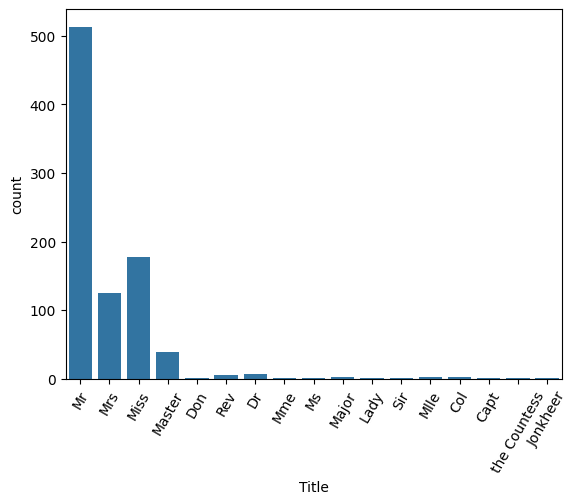

In [ ]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=60)
plt.show()

one-hot biến title
- 0: Master
- 1: Miss, Ms, Mlle và Mrs
- 2: Mr
- 3: Các Title khác

In [ ]:
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in train_df["Name"]]

train_df["Title"] = train_df["Title"].replace(
    ["Lady", "the Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"],
    "other"
)

train_df["Title"] = [
    0 if i == "Master"
    else 1 if i in ["Miss", "Ms", "Mlle", "Mrs"]
    else 2 if i == "Mr"
    else 3
    for i in train_df["Title"]
]

train_df["Title"].head(10)

,Title
0,2
1,1
2,1
3,1
4,2
5,2
6,2
7,0
8,1
9,1


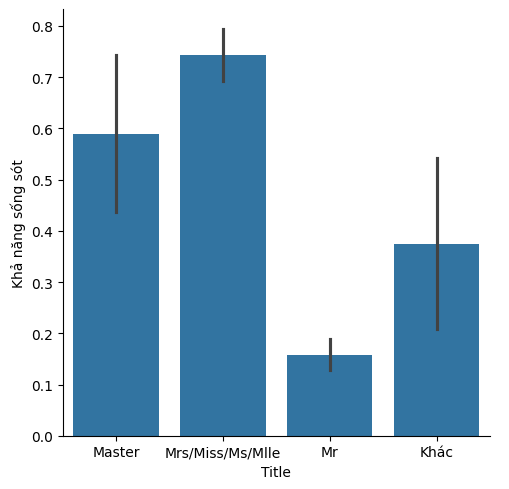

In [ ]:
# catplot khả năng sống sót dựa trên Title
g = sns.catplot(x="Title", y="Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master", "Mrs/Miss/Ms/Mlle", "Mr", "Khác"])
g.set_ylabels("Khả năng sống sót")
plt.show()

### Trích Fsize (family size) và family_size từ SibSP và Parch

fsize = Fsize = SibSp + Parch + 1 (là bản thân)

family_size:
- 1 khi fsize < 5
- 0 khi fsize >= 5


In [ ]:

train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

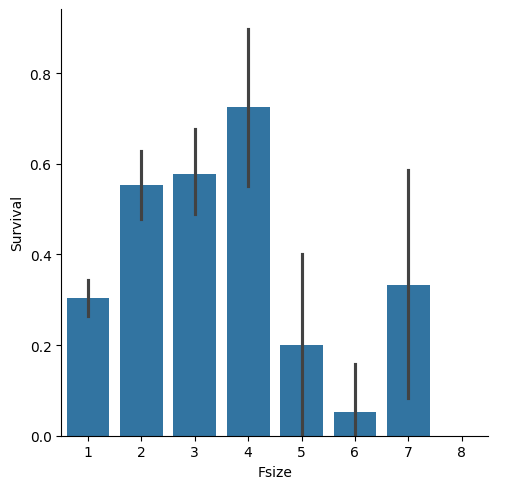

In [ ]:
# catplot giữa khả năng sóng sot với Fsize
g = sns.catplot(x="Fsize", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [ ]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

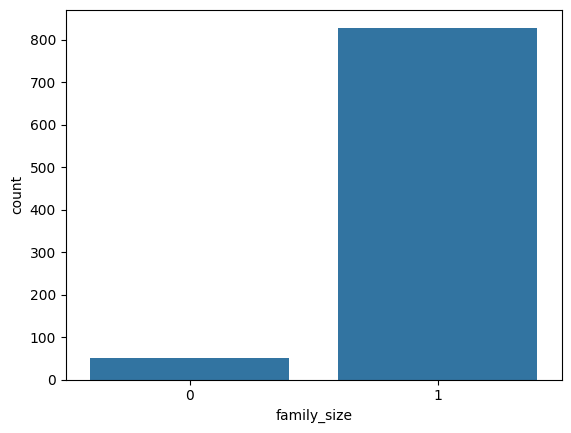

In [ ]:
# countplot giữa gia đình nhỏ và gia đình lớn
sns.countplot(x = "family_size", data = train_df)
plt.show()

### Trích Travelling Alone từ SibSp và Parch

- Biến IsAlone = 1 nếu SibSp + Parch = 0

In [ ]:
train_df["IsAlone"] = ((train_df["SibSp"] + train_df["Parch"]) == 0).astype(int)

,IsAlone,rate,count
0,0,0.514535,344
1,1,0.303538,537


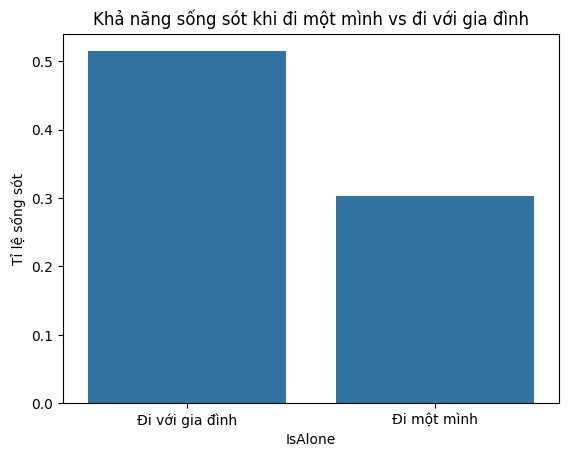

In [ ]:
isalone_summary = (train_df.groupby("IsAlone")["Survived"]
                   .agg(rate="mean", count="size")
                   .reset_index())
display(isalone_summary)
sns.barplot(data=isalone_summary, x="IsAlone", y="rate")
plt.ylabel("Tỉ lệ sống sót")
plt.title("Khả năng sống sót khi đi một mình vs đi với gia đình")
plt.xticks([0, 1], ["Đi với gia đình", "Đi một mình"])
plt.show()


### One-hot Embarked

- Từ Embarked, tạo 3 biến mới, đại diện cho từng bến cảng là
  - Embarked_C: 0 hoặc 1
  - Embarked_Q: 0 hoặc 1
  - Embarked_S: 0 hoặc 1

In [ ]:
train_df = pd.get_dummies(data=train_df, columns=["Embarked"], dtype=int)
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Fsize,family_size,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,2,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,2,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,2,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,1,1,1,0,0,1


### Định dạng lại Ticket

- Nếu Ticket không có tiền tố mà chỉ là số: thay thế bằng x
- Nếu Ticket có tiền tố: Chỉ lấy phần Chữ cái, bỏ ký tự "/" và cộng với chữ số đầu tiên ngay sau đó.
- ví dụ:
  - A/5 21171 -> A5
  - STON/O2. 3101282 -> STON02

In [ ]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".", "").replace("/", "").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [ ]:
display(train_df["Ticket"].head(10))

,Ticket
0,A5
1,PC
2,STONO2
3,x
4,x
5,x
6,x
7,x
8,x
9,x


In [ ]:
# Gom nhosm ticket nếu ticket có prefix lặp lại nhiều 1 lần:
# đồng thời liệt kê tỉ lệ sống sót của từng group
ticket_groups = (train_df.groupby("Ticket")["Survived"]
                 .agg(group_survival_rate="mean", group_size="size")
                 .reset_index())
multi_party = ticket_groups.query("group_size > 1")
display(multi_party.sort_values(["group_survival_rate", "group_size"],
                                ascending=[False, False]).head(10))
display(multi_party.sort_values(["group_survival_rate", "group_size"],
                                ascending=[True, False]).head(10))

,Ticket,group_survival_rate,group_size
27,SWPP,1.000000,2
7,FCC,0.800000,5
11,PP,0.666667,3
15,SCAH,0.666667,3
10,PC,0.650000,60
26,STONO2,0.500000,6
18,SCParis,0.500000,4
12,PPP,0.500000,2
17,SCPARIS,0.428571,7
25,STONO,0.416667,12


,Ticket,group_survival_rate,group_size
0,A4,0.000000,7
21,SOPP,0.000000,3
22,SOTONO2,0.000000,2
1,A5,0.095238,21
28,WC,0.100000,10
23,SOTONOQ,0.133333,15
19,SOC,0.166667,6
9,LINE,0.250000,4
29,WEP,0.333333,3
30,x,0.382979,658


### One-hoit Ticket

- Tên của giá trị từng biến: T_"tên của ticket group"

In [ ]:
train_df = pd.get_dummies(train_df, columns=["Ticket"], prefix="T", dtype=int)

In [ ]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,1


### One-hot Pclass

- Pclass sẽ được phân ra 3 biến mới là:
  - Pclass_1
  - Pclass_2
  - Pclass_3

In [ ]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Pclass"], dtype=int)
train_df.head(5)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,2,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,1,...,0,0,1,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,2,...,0,0,0,0,0,0,1,0,0,1


### One-hot sex

Sex sẽ được one-hot thành Sex_male và Sex_female

In [ ]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"], dtype=int)
train_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Cabin,Title,Fsize,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,2,2,...,0,0,0,0,0,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,1,2,...,0,0,0,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,1,1,...,1,0,0,0,0,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,1,2,...,0,0,0,0,1,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,NaN,2,1,...,0,0,0,0,1,0,0,1,0,1


### Trích deck-series từ ký tự đầu của Cabin

- Nếu cabin null -> Giá trị của deck-series là "unknown"
- Nếu cabin có giá trị -> gán ký tự đầu tiên cho deck-series

In [ ]:
deck_series = train_df["Cabin"].fillna("Unknown").apply(lambda x: x[0] if x != "Unknown" else "Unknown")

,CabinDeck,rate,count
3,D,0.757576,33
4,E,0.750000,32
1,B,0.744681,47
5,F,0.615385,13
2,C,0.589286,56
6,G,0.500000,4
0,A,0.466667,15
8,Unknown,0.302941,680
7,T,0.000000,1


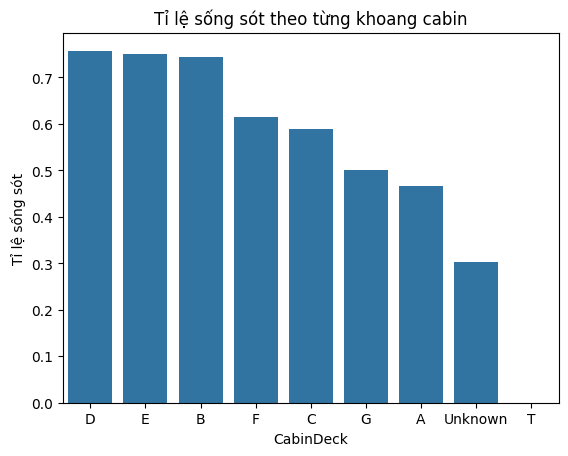

In [ ]:
deck_summary = (pd.DataFrame({"CabinDeck": deck_series, "Survived": train_df["Survived"]})
                .groupby("CabinDeck")["Survived"].agg(rate="mean", count="size")
                .reset_index()
                .sort_values("rate", ascending=False))
display(deck_summary)
sns.barplot(data=deck_summary, x="CabinDeck", y="rate")
plt.ylabel("Tỉ lệ sống sót")
plt.title("Tỉ lệ sống sót theo từng khoang cabin")
plt.show()

In [ ]:
# drop Name, PassengerId và Cabin để giảm nhiễu training data
train_df.drop(labels = ["Name" ,"PassengerId", "Cabin"], axis = 1, inplace = True)

# Huấn luyện model

Phần 1 chia dữ liệu đã xử lý thành tập huấn luyện/kiểm tra tiêu chuẩn, xây dựng mô hình baseline Logistic Regression,

Phần 2 sau đó sẽ tinh chỉnh siêu tham số bằng GridSearch kèm Stratified  K-Fold cho các mô hình Decision Tree, Random Forest và Logistic Regression.

Phần 3 sẽ đánh giá bằng độ chính xác (accuracy) trên cross-validation và trên tập kiểm tra.

cuối cùng ta sẽ kết hợp các mô hình nổi bật bằng VotingClassifier để kiểm nghiệm hiệu quả ensemble.


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

### Chia Train - Test

In [ ]:
train = train_df[:train_df_len]

X_train = train.drop(labels="Survived", axis=1)
y_train = train["Survived"]

# Train-Test tỉ lệ 67% / 33%
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.33, random_state=42
)

print("X_train:", len(X_train))
print("X_test :", len(X_test))
print("y_train:", len(y_train))
print("y_test :", len(y_test))

X_train: 590
X_test : 291
y_train: 590
y_test : 291


### Mô hình Simple Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# đánh giá độ chính xác trên set training và test
acc_log_train = round(log_reg.score(X_train, y_train) * 100, 2)
acc_log_test = round(log_reg.score(X_test, y_test) * 100, 2)

print("Độ chính xác dựa vào set training: % {}".format(acc_log_train))
print("Độ chính xác dựa vào set test : % {}".format(acc_log_test))

Độ chính xác dựa vào set training: % 81.53
Độ chính xác dựa vào set test : % 83.16


### Tinh chỉnh các siêu tham số (hyperparameter) bằng Grid Search và Cross Validation

In [ ]:
random_state = 42

classifier = [
    DecisionTreeClassifier(random_state=random_state),
    RandomForestClassifier(random_state=random_state),
    LogisticRegression(random_state=random_state),
]

dt_param_grid = {
    "min_samples_split": range(10, 500, 20),
    "max_depth": range(1, 20, 2)
}

rf_param_grid = {
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators": [100, 300],
    "criterion": ["gini"]
}

logreg_param_grid = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l1", "l2"],
    "max_iter": [200, 300, 500]
}


classifier_param = [
    dt_param_grid,
    rf_param_grid,
    logreg_param_grid
]

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

cv_result = []
best_estimators = []

for i in range(len(classifier)):
    clf = GridSearchCV(
        classifier[i],
        param_grid=classifier_param[i],
        cv=StratifiedKFold(n_splits=10),
        scoring="accuracy",
        n_jobs=1,
        verbose=1
    )
    clf.fit(X_train, y_train)

    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    # in ra điểm cross validation tốt nhất cho model
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8322033898305085
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.840677966101695
Fitting 10 folds for each of 42 candidates, totalling 420 fits
0.8152542372881355


In [ ]:
cv_results = pd.DataFrame({
    "Điểm Cross Validation trung vị": cv_result,
    "ML Models": [
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "LogisticRegression",
    ]
})
cv_results


,Điểm Cross Validation trung vị,ML Models
0,0.832203,DecisionTreeClassifier
1,0.840678,RandomForestClassifier
2,0.815254,LogisticRegression


**Nhận xét**: ta thấy mô hình Random Forest đạt độ chính xác trung vị cao nhất (0.8407), tiếp theo là Decision Tree (0.8322) và Logistic Regression (0.8153)

## Mô hình cuối cùng: Ensemble Modelling


In [ ]:
votingC = VotingClassifier(
    estimators=[
        ("dt", best_estimators[0]),
        ("rfc", best_estimators[1]),
        ("lr", best_estimators[2])
    ],
    voting="soft",
    n_jobs=1
)

votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test), y_test))

0.8350515463917526
